In [18]:
import tweepy as tw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")


In [19]:

consumer_key = 'AJS5G44OEK6YQNsKl8iDirAvn'
consumer_secret = 'CrzgE6iRRALufT1AsJlkCorRYLUUHUI0Ei7Sf14s7qYqmGQPZL'
access_token = '1268419235467968513-yVjoi1X1K3kC8GaG8nOTuguL22RWgC'
access_token_secret = 'szkrjxYhSfvdzIEPNN6xYsUJIWiCuodkphy7Lzm0iU8oc'
auth = tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tw.API(auth)


In [20]:
df =pd.read_csv('Coronavirus Tweets.csv')
df.shape


(544735, 22)

In [21]:
df.columns

Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'country_code', 'place_full_name', 'place_type', 'followers_count',
       'friends_count', 'account_lang', 'account_created_at', 'verified',
       'lang'],
      dtype='object')

In [22]:
tweet = df.copy()
tweet.drop(['status_id','user_id','screen_name','source','reply_to_status_id',
            'reply_to_user_id','is_retweet','place_full_name','place_type',
            'reply_to_screen_name','is_quote','followers_count','friends_count','account_lang',
            'account_created_at','verified'],axis=1, inplace = True)
tweet.head()

created_at                                               text  \
0  2020-04-16T00:00:00Z  Para complementar la higiene de tus manos, el ...   
1  2020-04-16T00:00:00Z  PWDs from Tahanang Walang Hagdan get aid amid ...   
2  2020-04-16T00:00:00Z  #France ได้รับความทุกข์ทรมานจาก # ชุดการแยกตัว...   
3  2020-04-16T00:00:00Z  Target ng Department of Health na magkaroon ng...   
4  2020-04-16T00:00:00Z  La @SSalud_mx lanzó una nueva convocatoria esp...   

   favourites_count  retweet_count country_code lang  
0              1828              2          NaN   es  
1              5449              1          NaN   tl  
2                27              0          NaN   th  
3               578              3          NaN   tl  
4              5743              0          NaN   es

In [23]:
tweet = tweet[tweet['lang'] == 'en']
tweet.head()

created_at                                               text  \
5   2020-04-16T00:00:00Z  G20 agrees to debt relief for poorest countrie...   
7   2020-04-16T00:00:00Z  B.C. health officials are urging people to kin...   
9   2020-04-16T00:00:00Z  The Lovely Lisa Ann Joins The Show LIVE From N...   
10  2020-04-16T00:00:00Z  @allisonnamias @ArriolaLR As @ethanbdm referen...   
11  2020-04-16T00:00:00Z  Study suggests higher rates of co-infection be...   

    favourites_count  retweet_count country_code lang  
5               1075              0          NaN   en  
7                501              0          NaN   en  
9              13891              0          NaN   en  
10               327              0          NaN   en  
11              1357            130          NaN   en

In [24]:
tweet.isna().sum()


tweet_list = list()

tweet_list =(tweet['text'].values)

#tweet_list

In [26]:
#tweet.sort_values('favourites_count',ascending = False).head()
fav = tweet[['favourites_count','text']].sort_values('favourites_count',ascending = False)[:10].reset_index()
for i in range(10):
    print(i+1,'.', fav['text'][i],'\n')

1 . Ever since the #COVID19 epidemic began i think I've only taken 2 naps 😴 the whole time that's how much my anxiety has been bothering me it's so not fun at all!! 😢😭 

2 . Horrible what @FashionNova is doing to people during the #COVID19 epidemic especially trying to get people to spend their stimulus checks on them that's not right!! 😡😤 https://t.co/Y51WA03UYs 

3 . This is a wonderful story of surviving #COVID19 and of hope https://t.co/2fhFVPV8BV 

4 . Listen to the most recent episode of my podcast: Digital democracy as a consequence of the #Coronavirus crisis  https://t.co/116Y5G3UWK 

5 . retorica tanta ma poi...#covid19 #coronavirus Charter flights bring Eastern European workers to the UK and Germany after farms fail to r @AJEnglish https://t.co/9N2eWbildx https://t.co/59kDn8nvXU 

6 . #Covid19 BBC News - #Coronavirus: The unexpected items deemed 'essential'
https://t.co/0ZCLnTR0qk 

7 . Le mascherine sono in #Cina e difficili da avere #Covid19 #Coronavirus19  Virus Supplies B

In [28]:
'''plt.figure(1, figsize=(10,6))
plt.hist(tweet["created_at"],bins = 24);
plt.xlabel('Hours',size = 15)
plt.ylabel('No. of Tweets',size = 15)
plt.title('No. of Tweets per Hour',size = 15)'''

'plt.figure(1, figsize=(10,6))\nplt.hist(tweet["created_at"],bins = 24);\nplt.xlabel(\'Hours\',size = 15)\nplt.ylabel(\'No. of Tweets\',size = 15)\nplt.title(\'No. of Tweets per Hour\',size = 15)'

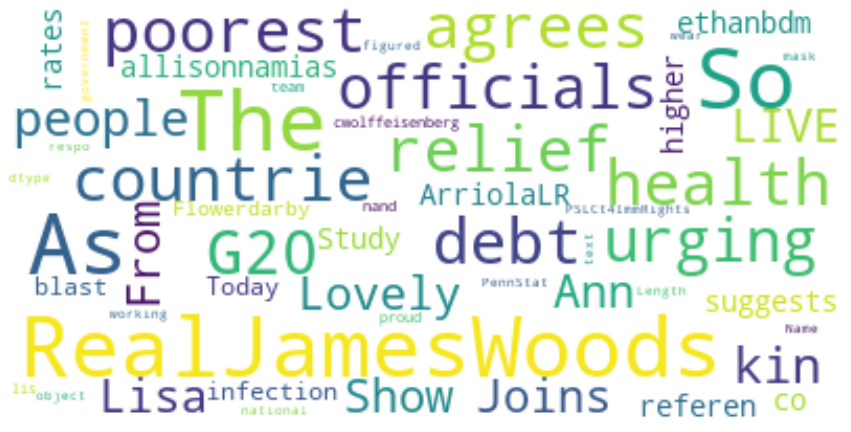

In [30]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(tweet['text'])

In [31]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [32]:
#Removing Stop Words
tweet['text'] = tweet['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stopwords]))
tweet['text'].head() 

5     G20 agrees debt relief poorest countries amid ...
7     B.C. health officials urging people kind jump ...
9     The Lovely Lisa Ann Joins The Show LIVE From N...
10    @allisonnamias @ArriolaLR As @ethanbdm referen...
11    Study suggests higher rates co-infection #SARS...
Name: text, dtype: object

In [51]:
tweet['text'] = tweet['text'].replace(r'http/S+', '', regex=True).replace(r'www/S+', '', regex=True)
tweet.text

5         G20 agrees debt relief poorest countries amid ...
7         B.C. health officials urging people kind jump ...
9         The Lovely Lisa Ann Joins The Show LIVE From N...
10        @allisonnamias @ArriolaLR As @ethanbdm referen...
11        Study suggests higher rates co-infection #SARS...
                                ...                        
544726    @RealJamesWoods @RealJamesWoods blast out? It ...
544727    Today @Flowerdarby @cwolffeisenberg @lisalibra...
544728    So proud team @PSLCt4ImmRights @PennStateLaw d...
544733    As national government working respond, many L...
544734    So, I figured wear mask, might well #Auburn #A...
Name: text, Length: 298213, dtype: object

In [59]:
tweet.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
tweet.text[:50]

5      G20 agrees debt relief poorest countries amid ...
7      B.C. health officials urging people kind jump ...
9      The Lovely Lisa Ann Joins The Show LIVE From N...
10     @allisonnamias @ArriolaLR As @ethanbdm referen...
11     Study suggests higher rates co-infection #SARS...
14     Gabriel Leung colleagues Hong Kong describe ac...
15     The @ato_gov_au provided SMSF trustees course ...
16     "It's late dad. My dad's gone, nothing's gonna...
17     Belarusian President Lukashenka, fresh hockey ...
20     We call Senate move forward vote TPS Venezuela...
21     While rest world works ensure eventual eradica...
22     We’re Al Tarazon spring. “I feel sad,” said Ox...
24     Today's #COVID19 update discusses care health ...
27     .@penamerica’s Writers’ Emergency Fund lifelin...
31     Repairing flaws industrial food production beg...
32     Join #Volunteer Resource Center #NewaygoCounty...
39     CHIP published new guidance response #COVID19 ...
40     @taxreformer MD @GovLarr

In [65]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text[:10000]) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

created_at                                               text  \
5   2020-04-16T00:00:00Z  G20 agrees debt relief poorest countries amid ...   
7   2020-04-16T00:00:00Z  B.C. health officials urging people kind jump ...   
9   2020-04-16T00:00:00Z  The Lovely Lisa Ann Joins The Show LIVE From N...   
10  2020-04-16T00:00:00Z  @allisonnamias @ArriolaLR As @ethanbdm referen...   
11  2020-04-16T00:00:00Z  Study suggests higher rates co-infection #SARS...   

    favourites_count  retweet_count country_code lang sentiment polarity  
5               1075              0          NaN   en               None  
7                501              0          NaN   en               None  
9              13891              0          NaN   en               None  
10               327              0          NaN   en               None  
11              1357            130          NaN   en               None

            292873
positive      4451
neutral       3545
negative      2004
Name: sentiment, dtype: int64


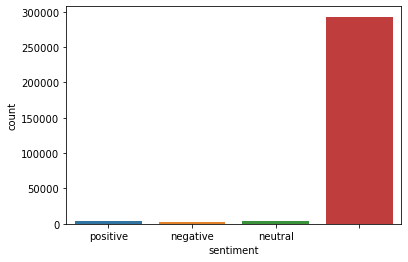

In [67]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

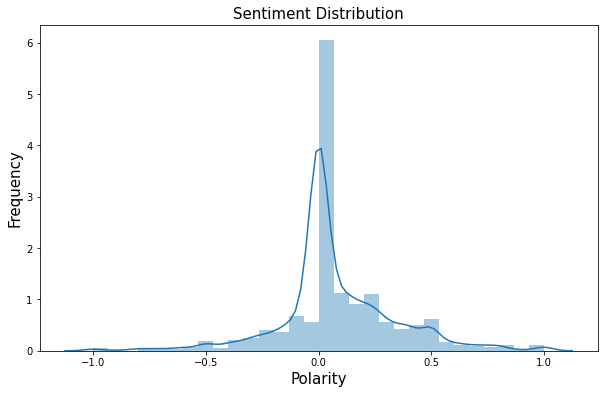

In [68]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

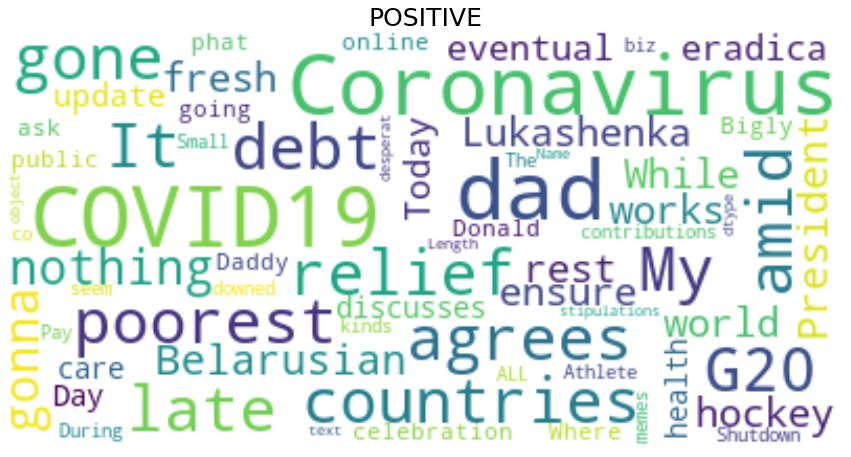

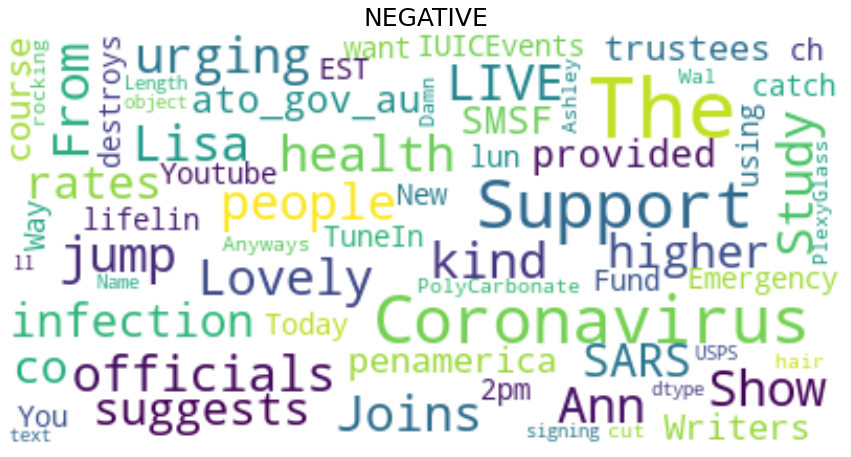

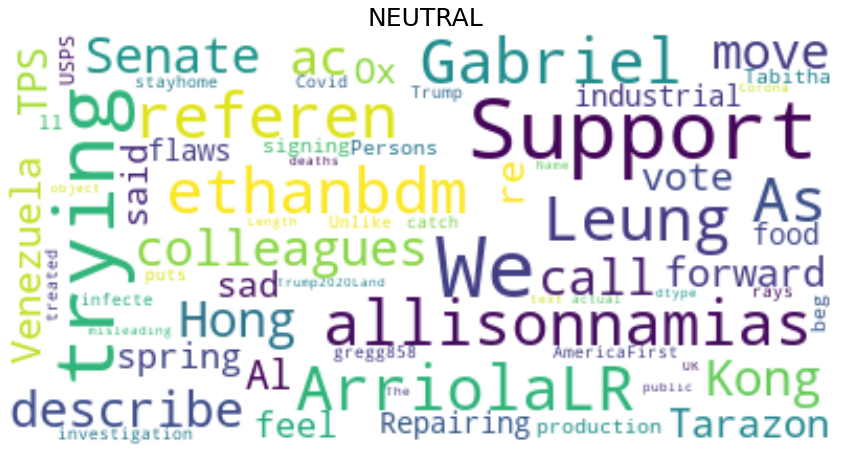

In [69]:
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'POSITIVE')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'NEUTRAL')

In [70]:
count = pd.DataFrame(tweet.groupby('sentiment')['favourites_count'].sum())
count.head()

favourites_count
sentiment                  
                 3515307186
negative           13678929
neutral            31249896
positive           36146564

In [71]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [72]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head()

word  frequency
0      #COVID19     115520
1  #coronavirus      56736
2         &amp;      35398
3             I      35022
4     #Covid_19      34367

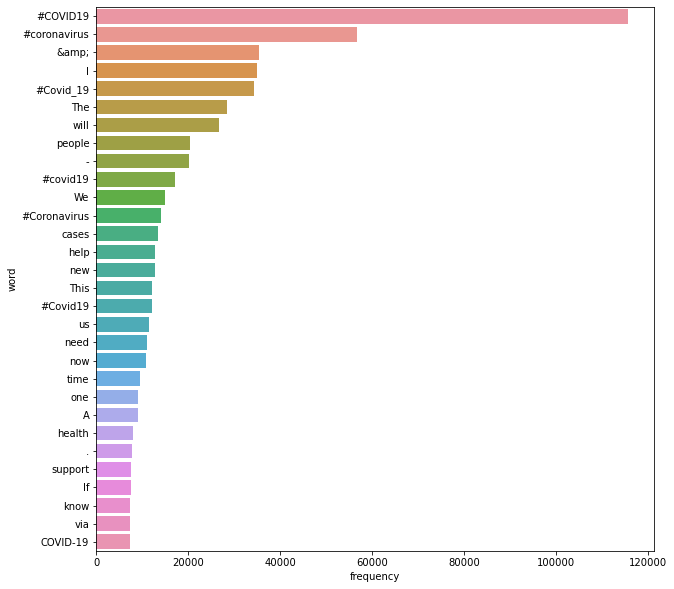

In [73]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

# Part 2 : Sentiment analysis of LATEST TWEETS

In [37]:
search_query  = '#corona'
search_lang = 'en'
date_since = '2020-01-01'
api = tw.API(auth, wait_on_rate_limit=True)
#ublic_tweets = api.search('corona')

covidtweets = tw.Cursor(api.search,q = search_query,lang = search_lang,since = date_since).items(50)

f = open('Latest Twitter data.txt','a+',encoding="utf-8")

for item in covidtweets:
    f.write(item.text.lower())
    
print('Latest Tweets updated in file')

f.close()


Latest Tweets updated in file


In [38]:
for tweet in covidtweets:
  print(tweet.text)
  analysis = TextBlob(tweet.text)
  print(analysis.sentiment)

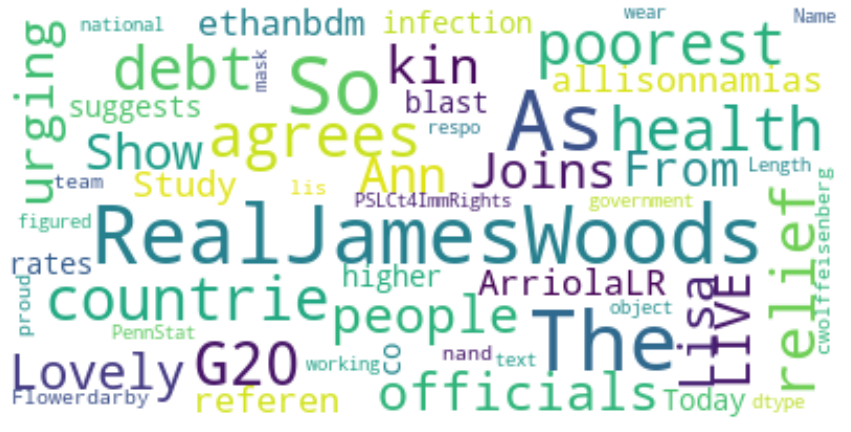